# Machine Learning A-Z Python

## Regression

## Part 1. Simple Linear Regression (Continuous regression)
### Simple case of linear regression problems with 1 independent variable

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset= pd.read_csv('Salary_Data.csv')
print(dataset.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


* Independent variable: Years Experience

* Dependent variable: Salary

In [43]:
X = dataset.iloc[:,:-1].values # all independent variables
y = dataset.iloc[:,-1].values # dependent variables

print(X.ndim, y.ndim)
X.shape, y.shape

2 1


((30, 1), (30,))

We have to use `X = dataset.iloc[:,:-1]` instead of `X = dataset.iloc[:,0]`for column selection in X because we want X to be a matrix.

Where as y should be (30,) because we want it to be a vector and not matrix

In [44]:
# No missing data and no categorical columns in the dataset

# Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size=1/3,)

In [45]:
# Fitting Simple Linear Regression to the Training Set

from sklearn.linear_model import LinearRegression # LinearRegression class
regressor = LinearRegression() # Instantiate LinearRegression by creating an object, regressor

regressor.fit(X_train, y_train) # fit object regressor to the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Predicted values of the dependent variables
y_pred

array([107280.07726583,  35400.91483339,  52424.92698844,  99713.84964136,
        45804.47781703,  53370.7054415 ,  75123.60986184,  55262.26234761,
       114846.3048903 ,  80798.28058019])

y_test is the real salary and y_pred is the predicted salary.

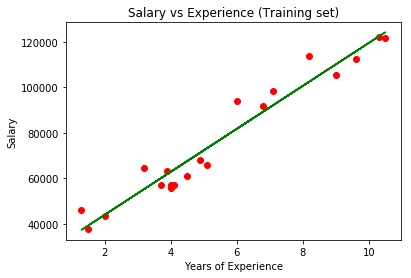

In [47]:
# Visualizing the Training set results
plt.scatter(X_train, y_train, color='red')

# To plot the linear regression line
plt.plot(X_train, regressor.predict(X_train), color='green')

plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**RESULT:** 

* In the graph red dots are made from _actual years of experience vs actual salary_.

* Regression line (green) is created by _actual years of experience vs predicted salary_ by the model.

#### Visualizing the TEST set results 

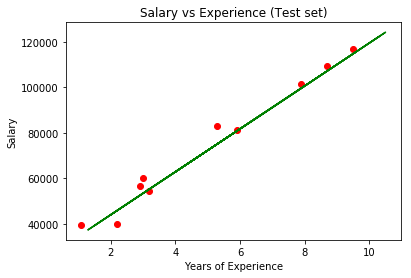

In [48]:
# Visualizing the Test set results
plt.scatter(X_test, y_test, color='red')

# To plot the linear regression line
plt.plot(X_train, regressor.predict(X_train), color='green') 
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Result: **

Here we are trying to figure out whether the regression line fitted on training data works well with test data. If the model has fitted well, it will behave well with test data as well. Here we see test data (red dots) are in close proximity with green regression line. Thus, Linear Regression is a good model for this dataset.

## But how can we quantify how good is the model?

In [54]:
# Method 1_calculating accuracy

regressor.score(X_test, y_test)

0.9736511382997333

Predicted test set with 97.3% accuracy

In [55]:
# Method 2_calculating accuracy

from sklearn.model_selection import cross_val_score

score = cross_val_score(regressor, X_test, y_test, cv=5)
score

array([0.99625712, 0.99272548, 0.52605925, 0.89247468, 0.98965935])

In [56]:
np.mean(score), np.std(score)

(0.8794351767000397, 0.1809287157169813)

Wow! Middle one really pulling down the accuracy % and standard deviation is pretty high too.

In [57]:
# Method 3_calculating accuracy

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True) 
score = cross_val_score(regressor, X, y, cv=kf)
# No need to split data here
score

array([0.91014019, 0.99715729, 0.96627574, 0.92426791, 0.90777843])

In [58]:
score.mean(), score.std()

(0.9411239124041799, 0.03500969027815618)

Nice accuracy again as we shuffle the data